# Modelo PAC (Passive Agressive Classifier)

**Autor:** Mariluz Daniela Sánchez Morales 

**Descripción:** Este notebook realiza el desarrollo, entrenamiento y evaluación del modelo Passive Aggressive Classfier utilizando distintas técnicas como el ajuste de hiperparámetros con GridSearchCV, validación cruzada estratificada (Stratified K-Fold), y análisis comparativo mediante métricas como AUC, TPR, FPR y curvas ROC.

In [1]:
%matplotlib inline

# Acceso a archivos
import os
import sys

# Visualización de métricas
import matplotlib.pyplot as plt

# Librería que divide en test y train el dataset, permite usar un stratified K-Fold, con la finalidad de revisar hiperparámetros
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score
# Importación de el modelo a entrenar: PAC
from sklearn.linear_model import PassiveAggressiveClassifier

In [2]:
# Importación de funciones centralizadas
sys.path.append(os.path.abspath("../funciones"))

from funcionesEntrenamiento import (
    cargar_datos_entrenamiento,
    cargar_datos_prueba,
    imprimir_forma,
    division_train_val,
    reporte_clasificacion,
    crear_matriz_confusion,
    calcular_roc_auc,
    metricas_tpr_fpr,
    hacer_pepinillo
)

In [3]:
# Cargar datos y separar características y columna con las clases con función
X, y = cargar_datos_entrenamiento()

shape, head = imprimir_forma(X)
print("Shape: ", shape)
head

Shape:  (1500, 1568)


,longitud_texto,num_palabras,comida,restriccion,purga,imagen_corporal,ejercicio,polaridad,subjetividad,tag_Anorexia,...,tfidf_1490,tfidf_1491,tfidf_1492,tfidf_1493,tfidf_1494,tfidf_1495,tfidf_1496,tfidf_1497,tfidf_1498,tfidf_1499
0,0.238798,-0.062255,0,0,0,0,0,1.168716,0.355986,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.536538,-1.607600,0,0,0,0,0,-0.346445,-1.134095,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.453282,-0.283019,3,2,0,0,0,0.789926,0.952018,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.329069,0.158508,0,0,0,1,0,1.774781,0.654002,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.784277,-0.724546,0,0,0,1,0,-1.331300,0.952018,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# División estratificada (80/20) con función
X_train, X_val, y_train, y_val = division_train_val(X,y)


print(f"Forma de conjunto de entrenamiento:", X_train.shape)
print(f"Forma de conjunto de validación:", X_val.shape)

Forma de conjunto de entrenamiento: (1200, 1568)
Forma de conjunto de validación: (300, 1568)


## Entrenamiento inicial de PAC

In [5]:
# Entrenamiento del modelo con parámetros default
pac_inicial = PassiveAggressiveClassifier(random_state=22)

scores = cross_val_score(pac_inicial, X_train, y_train, cv=5,scoring='roc_auc')

print("Resultados por fold:", scores)
print("Precisión promedio:", scores.mean())

Resultados por fold: [0.93155947 0.91549689 0.91563657 0.90687779 0.94458008]
Precisión promedio: 0.9228301587574389


In [6]:
pac_inicial.fit(X_train, y_train)

PassiveAggressiveClassifier(random_state=22)

In [7]:
# Validación de modelo inicial y cálculo de métricas de evaluación
y_pred_inicial, y_scores_inicial, reporte_inicial = reporte_clasificacion(X_val, y_val, pac_inicial, True)

print("Classification Report:")
print(reporte_inicial)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84       139
           1       0.85      0.89      0.87       161

    accuracy                           0.85       300
   macro avg       0.85      0.85      0.85       300
weighted avg       0.85      0.85      0.85       300



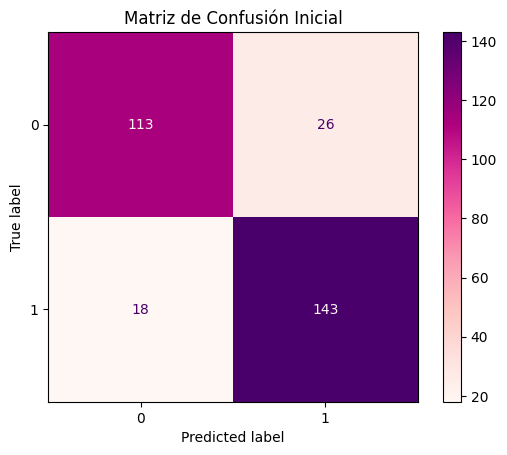

In [8]:
# Gráfica de matríz de confusión
cm_inicial, disp_inicial = crear_matriz_confusion(y_val, y_pred_inicial)
disp_inicial.plot(cmap='RdPu')
plt.title("Matriz de Confusión Inicial")
plt.show()

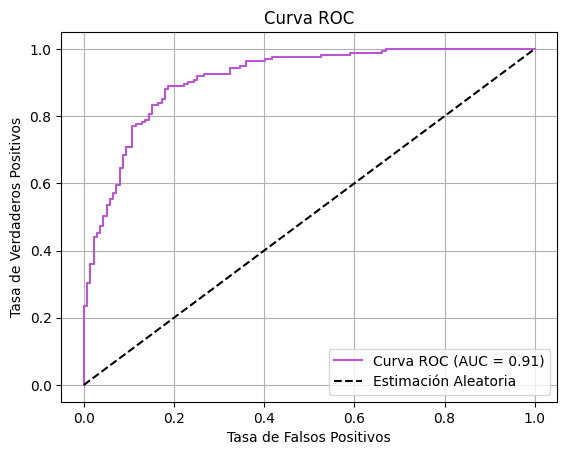

In [9]:
# Predicciones de probabilidad (para curva ROC)
fpr_inicial, tpr_inicial, thresholds_inicial, auc_score_inicial = calcular_roc_auc(y_val, y_scores_inicial)

# Gráfica de ROC
plt.figure()
plt.plot(fpr_inicial, tpr_inicial, color='mediumorchid', label=f"Curva ROC (AUC = {auc_score_inicial:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Estimación Aleatoria")
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [10]:
# Cálculo de métricas de desempeño de la matriz de confusión
TPR_inicial, FPR_inicial = metricas_tpr_fpr(cm_inicial)

# Mostrar métricas
print(f"AUC: {(auc_score_inicial * 100):.4f}")
print(f"TPR (Tasa de Positivos Verdaderos): {(TPR_inicial * 100):.4f}")
print(f"FPR (Tasa de Falsos Positivos): {(FPR_inicial * 100):.4f}")

AUC: 91.2016
TPR (Tasa de Positivos Verdaderos): 88.8199
FPR (Tasa de Falsos Positivos): 18.7050


## Busqueda de mejores parámetros (Entrenamiento y Validación)

In [26]:
# Modelo base para encontrar mejores parámetros
pac = PassiveAggressiveClassifier(random_state=22)

# Parámetros a buscar con GridSearchSV 
param_grid = {
    'C': [0.0005, 0.001, 0.05],
    'max_iter': [180, 200, 220],
    'loss': ['hinge', 'squared_hinge']
}

# Cross-validation estratificada
cv = StratifiedKFold(
    n_splits=5, 
    shuffle=True, 
    random_state=22
)

# GridSearch
grid = GridSearchCV(
    estimator=pac, 
    param_grid=param_grid, 
    cv=cv, 
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    error_score='raise'
)

In [27]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=22, shuffle=True),
             error_score='raise',
             estimator=PassiveAggressiveClassifier(random_state=22), n_jobs=-1,
             param_grid={'C': [0.0005, 0.001, 0.05],
                         'loss': ['hinge', 'squared_hinge'],
                         'max_iter': [180, 200, 220]},
             scoring='roc_auc', verbose=1)

In [29]:
# Ver mejores hiperparámetros encontrados
grid.best_params_

{'C': 0.001, 'loss': 'squared_hinge', 'max_iter': 200}

In [30]:
# Creación de modelo con los mejores parámetros
best_pac = PassiveAggressiveClassifier(
    C=0.001,
    max_iter=200,
    loss='squared_hinge',
    random_state=22
)

best_pac.fit(X_train, y_train)

PassiveAggressiveClassifier(C=0.001, loss='squared_hinge', max_iter=200,
                            random_state=22)

In [31]:
# Validación del modelo
y_pred, y_scores, reporte = reporte_clasificacion(X_val, y_val, best_pac, True)

print("Classification Report:")
print(reporte)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       139
           1       0.86      0.88      0.87       161

    accuracy                           0.86       300
   macro avg       0.86      0.85      0.86       300
weighted avg       0.86      0.86      0.86       300



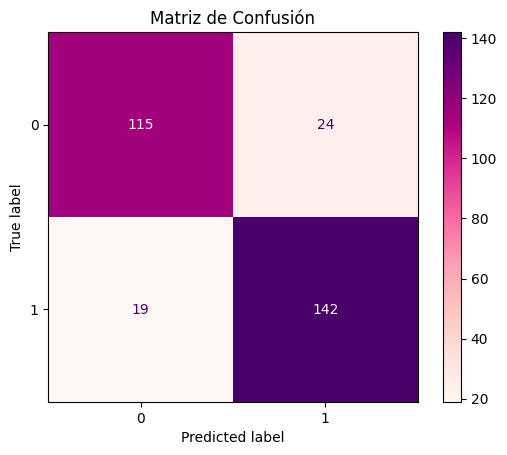

In [32]:
# Matriz de confusión
cm, disp = crear_matriz_confusion(y_val, y_pred)
disp.plot(cmap="RdPu")
plt.title("Matriz de Confusión")
plt.show()

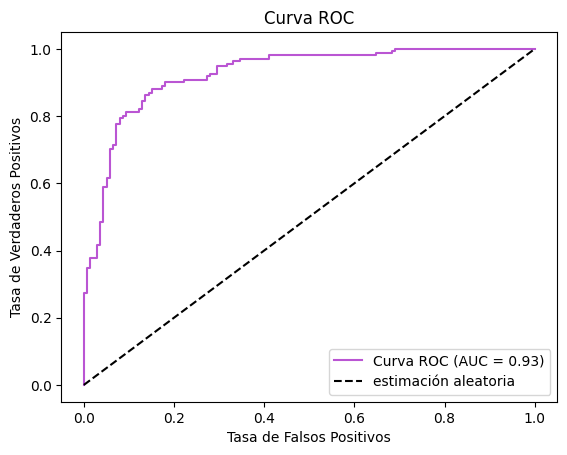

In [33]:
# Predicciones de scores (para curva ROC)
fpr, tpr, thresholds, auc_score = calcular_roc_auc(y_val, y_scores)

# Gráfica de ROC
plt.plot(fpr, tpr, color='mediumorchid', label=f"Curva ROC (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], "k--", label='estimación aleatoria')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

In [34]:
# Cálculo de métricas de desempeño de la matriz de confusión
TPR, FPR = metricas_tpr_fpr(cm)

# Mostrar métricas
print(f"AUC: {(auc_score * 100):.4f}")
print(f"TPR (Tasa de Verdaderos Positivos): {(TPR * 100):.4f}")
print(f"FPR (Tasa de Falsos Positivos): {(FPR * 100):.4f}")

AUC: 92.5957
TPR (Tasa de Verdaderos Positivos): 88.1988
FPR (Tasa de Falsos Positivos): 17.2662


## Modelo Final (Entrenamiento y Prueba)

In [35]:
# Modelo entrenado con todos los datos de ds_tradicional
modelPAC = PassiveAggressiveClassifier(
    C=0.001,
    max_iter=200,
    loss='squared_hinge',
    random_state=22
)
modelPAC.fit(X, y)

PassiveAggressiveClassifier(C=0.001, loss='squared_hinge', max_iter=200,
                            random_state=22)

In [36]:
# Cargar datos y separar características y columna con las clases con función 
X_test, y_test = cargar_datos_prueba()

shape_test, head_test = imprimir_forma(X_test)
print("Shape: ", shape_test)
head_test

Shape:  (250, 1568)


,longitud_texto,num_palabras,comida,restriccion,purga,imagen_corporal,ejercicio,polaridad,subjetividad,tag_Anorexia,...,tfidf_1490,tfidf_1491,tfidf_1492,tfidf_1493,tfidf_1494,tfidf_1495,tfidf_1496,tfidf_1497,tfidf_1498,tfidf_1499
0,-0.393101,-0.503783,0,1,0,0,0,0.966695,1.349373,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.315037,2.366144,0,1,0,1,1,-0.194929,0.542246,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.874548,-0.724546,2,2,0,0,0,-0.346445,-1.134095,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.178617,-0.283019,1,3,0,1,0,-0.346445,-1.134095,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.315037,3.249199,1,3,0,0,0,-0.346445,-1.134095,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
#Prueba del modelo final
y_pred_test, y_scores_test, reporte_test = reporte_clasificacion(X_test, y_test, modelPAC, True)

print("Classification Report:")
print(reporte_test)

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.82       116
           1       0.82      0.92      0.87       134

    accuracy                           0.85       250
   macro avg       0.85      0.84      0.85       250
weighted avg       0.85      0.85      0.85       250



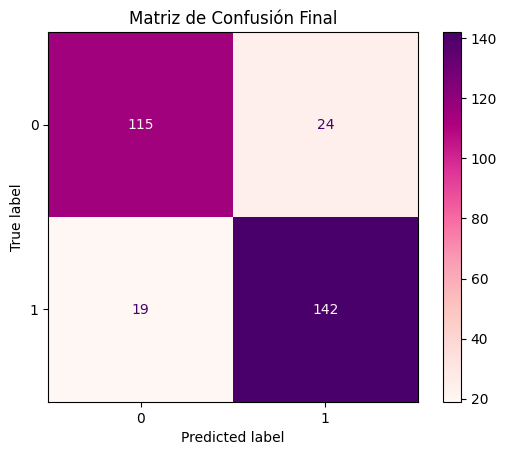

In [40]:
# Matriz de confusión
cm_test, disp_test = crear_matriz_confusion(y_test, y_pred_test)

disp.plot(cmap="RdPu")
plt.title("Matriz de Confusión Final")
plt.show()

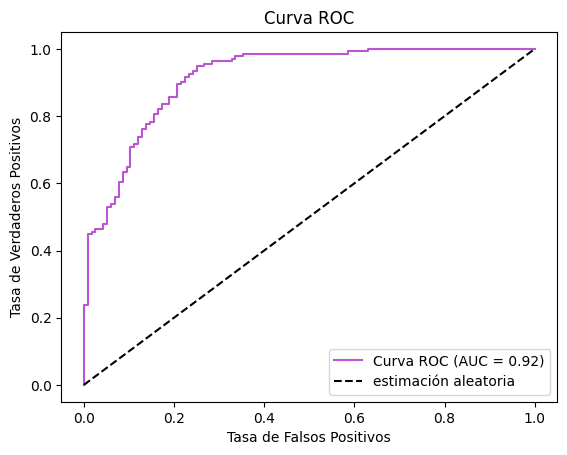

In [41]:
# Predicciones de probabilidad (para curva ROC)
fpr_test, tpr_test, thresholds_test, auc_score_test = calcular_roc_auc(y_test, y_scores_test)

# Gráfica ROC
plt.plot(fpr_test, tpr_test,color='mediumorchid', label=f"Curva ROC (AUC = {auc_score_test:.2f})")
plt.plot([0, 1], [0, 1], "k--", label='estimación aleatoria')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.show()

In [42]:
# Cálculo de métricas de desempeño de la matriz de confusión
TPR_Test, FPR_Test = metricas_tpr_fpr(cm_test)

# Mostrar métricas
print(f"AUC: {(auc_score_test * 100):.4f}")
print(f"TPR (Tasa de Verdaderos Positivos): {(TPR_Test * 100):.4f}")
print(f"FPR (Tasa de Falsos Positivos): {(FPR_Test * 100):.4f}")

AUC: 91.5852
TPR (Tasa de Verdaderos Positivos): 91.7910
FPR (Tasa de Falsos Positivos): 23.2759


In [43]:
# Guardado del modelo final en un archivo pickle
hacer_pepinillo(modelPAC, "modelPAC.pkl")